# It is a demo for face detector class and relative APIs.

In [1]:


import numpy as np
from frameROI import FrameROI as  fr
from vgg_face import VGGface 
from face_detector1 import FaceDetector 
from facedetector_evaluation import videoDetectorEvaluation , Video2Frame
import cv2

import matplotlib.pyplot as plt
import os 
from IPython.display import Image


Using TensorFlow backend.


In [2]:

rawimg= '../data/test2.jpg'#videoframe/5695231002474224804_veg300_20.jpg'
#rawimg= '../data/test2_noface.png'
saveto= '../data/model_evaluation3'



In [3]:

# # fr.createROIs?
# x= None
# if x ==None:
#     print('none')
#     print(np.zeros(len(annotations)).astype(np.uint32))


In [4]:

#model= VGGface.detect_roi_fromRawImg#, 
model= FaceDetector.detect_cv2dnn_fromRawImg_conf7 
#------------------------------------------------------------------------------
annotations = model(rawimg)
print(annotations)

#create a relative labels for the annotation
labels= np.zeros(annotations.shape[0]) # here param:labels  is just set for the manual annotation_txt. 
#------------------------------------------------------------------------------

# annotate face boundingbox and save
ROI=fr(rawimg, annotations=annotations, labels=labels , saveto_directory=saveto )


[[131 172  78  97]
 [457 147  62  93]
 [ 64 175  66  81]
 [356 136  48  64]
 [585 251  76 117]
 [244 179  64  86]
 [316  90  43  51]
 [114  55  57  63]
 [346 272  56  94]
 [ 52  57  46  53]
 [201 100  48  52]
 [568 171  27  35]
 [523 192  27  31]]


- Write a python script to extract the recognised faces and resize the images to (224, 224, 3) then flatten to a single dimension array of length 150528.  

- If possible return a numpy matrix of size (150528, number of faces) <font color=blue>I think that matrix should be (number of faces, 150528)?</font>. If that is not possible, extract the face and save as an image, jpg, png, etc.

(13, 224, 224, 3)


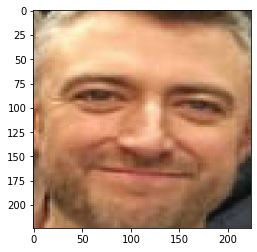

In [17]:
n,faces_flatten= ROI.createROIs(crop=0,  # if crop==1: crop and save all the ROIs
               save=1,boundingbox_color=(200,255,0), #save: whether save annotated image. means annotate rois on the original image.
               return_RoiArray= True, #if true, return (the number of ROI detected,  ROIs (numpyarray)).if false ,only return the number of ROI detected. default FALSE
               return_RoiArray_2RGB= True,# if true, return RGB numpyarray, otherwise default BGR
               flatten=0,  # if true, return flattened numpyarrays of the ROIs. default false
               resize_wh=(224,224) 
               )

print(faces_flatten.shape)
plt.imshow(faces_flatten[0].reshape(224,224,3))# (height,width, channel)
# plt.imshow(faces_flatten[0])


In [22]:
# #evaluation 
video='../data/5695231002474224804_veg300.wmv'
annotation_txt= '../data/5695231002474224804_veg300_gt.txt'

vd= Video2Frame(video, saveframe=0, savedir= '../data/model_evaluation2/eva1')
rsl= vd.createfaces( model=model,
                    
               crop=0, 
               save=1,boundingbox_color=(200,255,0),
               return_RoiArray= True,
               flatten=1,
               return_RoiArray_2RGB=True#,
#                resize_wh=(224,224)
                   )


[ #######################################] 99 frames completed!


99


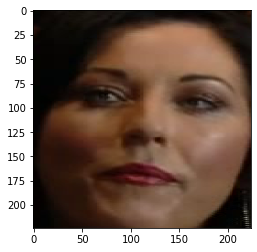

In [24]:
print(len(rsl))
rsl[0].shape
plt.imshow(rsl[0][0].reshape(224,224,3) )

When setting the param: crop= 1 , so the recognised faces will all be cropped and saved to desinated dir, as the desinated size of course. And we can check that dir or show it in notebook. 


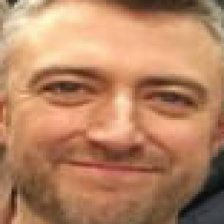

In [21]:

# # to see the saved croped image of head. the name come from annotations and labels above.
Image(filename=os.path.join(saveto,'test2_crop_0.0_0.png')) 